Multivariate Linear Regression Implementation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#initialzation
def initialization(lenw):
    w=np.random.randn(1,lenw)
    b=0
    return w,b

In [17]:
def forward(X,w,b):
    z=np.dot(w,X)+b
    return z

In [18]:
def cost(z,y):
    m=X.shape[1]
    j=(1/(2*m))*np.sum((z-y)**2)
    return j

In [23]:
def backpropagation(X,y,z):
    m=X.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)
    db=np.sum(dz)
    return dw,db

In [24]:
def gradient(w,b,dw,db,lr):
    w=w-lr*dw
    b=b-lr*db
    return w,b

In [25]:
#dataset loading and splitting
housing = fetch_california_housing()
X = housing.data      
y = housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.T

# Reshape y to have shape (1, m)
y = y.reshape(1, -1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled.T, y.T, train_size=0.8, random_state=10)
X_train = X_train.T  
X_test = X_test.T    
y_train = y_train.T  
y_test = y_test.T


In [28]:
n_features = X_train.shape[0]
w, b = initialization(n_features)

lr= 0.01
n_iterations = 1000
costs= []

for i in range(n_iterations+1):
    z = forward(X_train, w, b)  
    j = cost(z, y_train)
    costs.append(j)
    dw, db = backpropagation(X_train, y_train, z)
    w, b = gradient(w, b, dw, db, lr)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {j}")

print("\nLearned parameters:")
print("Weights:", w)
print("Bias:", b)

Iteration 0: Cost = 7317.872562594803
Iteration 100: Cost = 1205.1663215083229
Iteration 200: Cost = 653.3537519128627
Iteration 300: Cost = 579.5561130289888
Iteration 400: Cost = 566.763870512201
Iteration 500: Cost = 562.4714321114765
Iteration 600: Cost = 559.6149932407302
Iteration 700: Cost = 557.2042248163657
Iteration 800: Cost = 555.074137316923
Iteration 900: Cost = 553.176139775311
Iteration 1000: Cost = 551.4810175337401

Learned parameters:
Weights: [[ 0.66763136  0.10609466  0.07494956  0.008747   -0.004706   -0.04923906
  -1.13985607 -1.08815402]]
Bias: 2.0674641356009533


In [29]:
#testing
z_test = forward(X_test, w, b)
test_cost = cost(z_test, y_test)
print("\nMSE:", test_cost)


MSE: 146.10603135012664


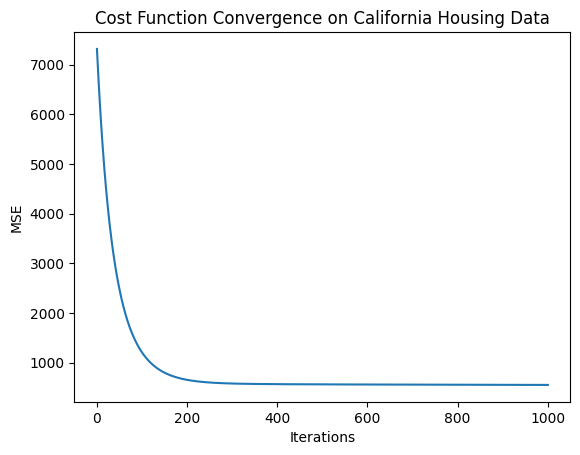

In [31]:
#plotting
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Cost Function Convergence on California Housing Data")
plt.show()